# Goodreads Book Data Analysist 

## Introduction

In this Jupyter notebook i took a look at the [Goodreads Book Dataset](https://www.kaggle.com/datasets/kutayahin/goodreads-books-dataset/data).

## Table of Contents

- [Exploratary Data Analysis](Exploratary-Data-Analysis) 
- [Preprocessing Text Data](Processing-of-Textdata)
- [Preparing the Data for Machine Learning](Preparing-the-Data-for-Machine-Learning)

In [2]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np

In [3]:
import kagglehub
import kaggle
from kagglehub import KaggleDatasetAdapter
kaggle.api.authenticate()
# Download latest version
kaggle.api.dataset_download_files("kutayahin/goodreads-books-dataset",path=".",unzip=True)


Dataset URL: https://www.kaggle.com/datasets/kutayahin/goodreads-books-dataset


In [4]:
with open('watch_db.csv') as f:
    print(f)

<_io.TextIOWrapper name='watch_db.csv' mode='r' encoding='cp1252'>


## Exploratary Data Analysis 

In [4]:
df = pd.read_csv("./goodreads_books_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  3045 non-null   int64  
 1   percentile_rank       3045 non-null   float64
 2   book_id               3045 non-null   int64  
 3   title                 3045 non-null   object 
 4   author                3045 non-null   object 
 5   rating                3045 non-null   float64
 6   rating_category       3043 non-null   object 
 7   rating_tier           3045 non-null   object 
 8   is_high_rated         3045 non-null   bool   
 9   title_length          3045 non-null   int64  
 10  title_complexity      3045 non-null   object 
 11  word_count            3045 non-null   int64  
 12  author_count          3045 non-null   int64  
 13  author_name_length    3045 non-null   int64  
 14  has_series_info       3045 non-null   bool   
 15  series_number        

In [7]:
df.describe()

,rank,percentile_rank,book_id,rating,title_length,word_count,author_count,author_name_length,series_number
count,3045.000000,3045.000000,3.045000e+03,3045.000000,3045.000000,3045.000000,3045.0,3045.000000,1194.000000
mean,1523.000000,50.016420,1.737300e+07,4.057672,32.585550,5.586207,1.0,13.762233,3.484087
std,879.160111,28.872182,3.436127e+07,0.286059,19.980501,3.413018,0.0,3.190402,7.921990
min,1.000000,0.000000,1.100000e+01,0.000000,1.000000,1.000000,1.0,4.000000,0.000000
25%,762.000000,25.000000,9.394800e+04,3.890000,17.000000,3.000000,1.0,12.000000,1.000000
50%,1523.000000,50.000000,1.148385e+06,4.070000,30.000000,5.000000,1.0,13.000000,2.000000
75%,2284.000000,75.000000,2.349650e+07,4.240000,43.000000,7.000000,1.0,16.000000,3.000000
max,3045.000000,100.000000,2.347301e+08,4.930000,166.000000,29.000000,1.0,27.000000,146.000000


In [10]:
print(df.isnull().sum())
# Fill NaN in Series Number with 0 to not loose StandAlone titles, drop the remaining NaN titles
df["series_number"]=df["series_number"].fillna(0)
df.dropna(inplace=True)

rank                       0
percentile_rank            0
book_id                    0
title                      0
author                     0
rating                     0
rating_category            2
rating_tier                0
is_high_rated              0
title_length               0
title_complexity           0
word_count                 0
author_count               0
author_name_length         0
has_series_info            0
series_number           1851
title_type                 0
has_subtitle               0
has_middle_name            0
estimated_popularity       0
dtype: int64


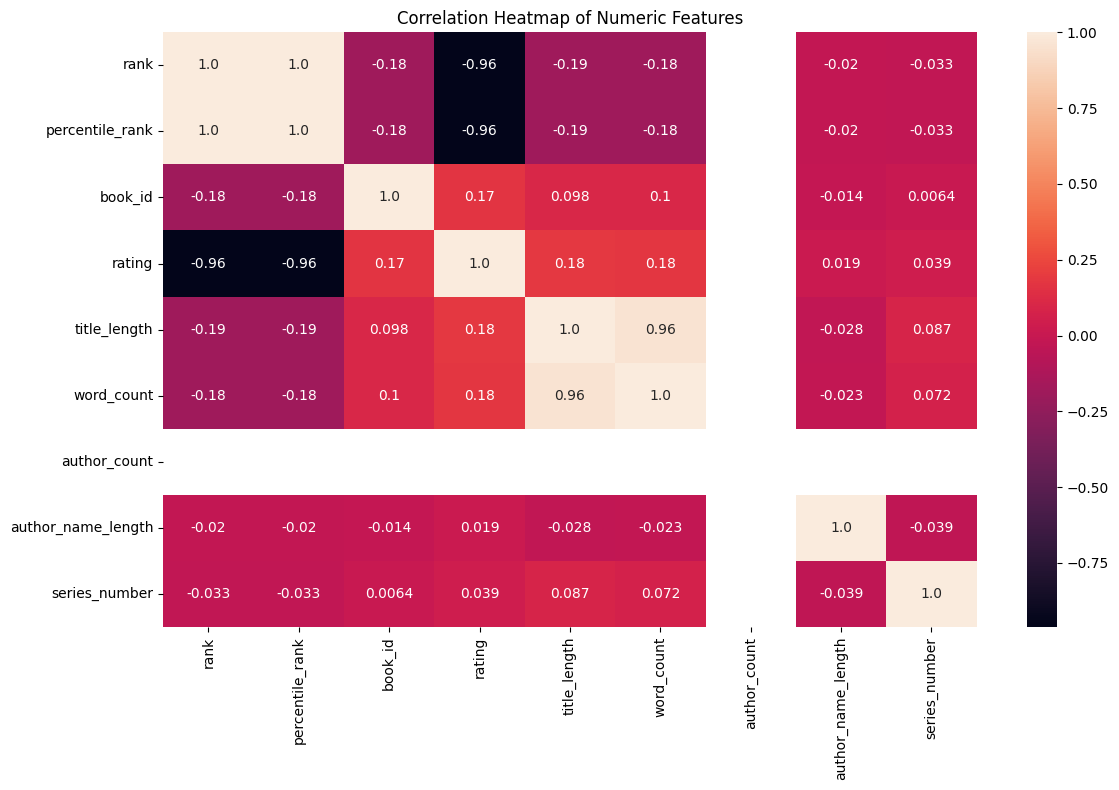

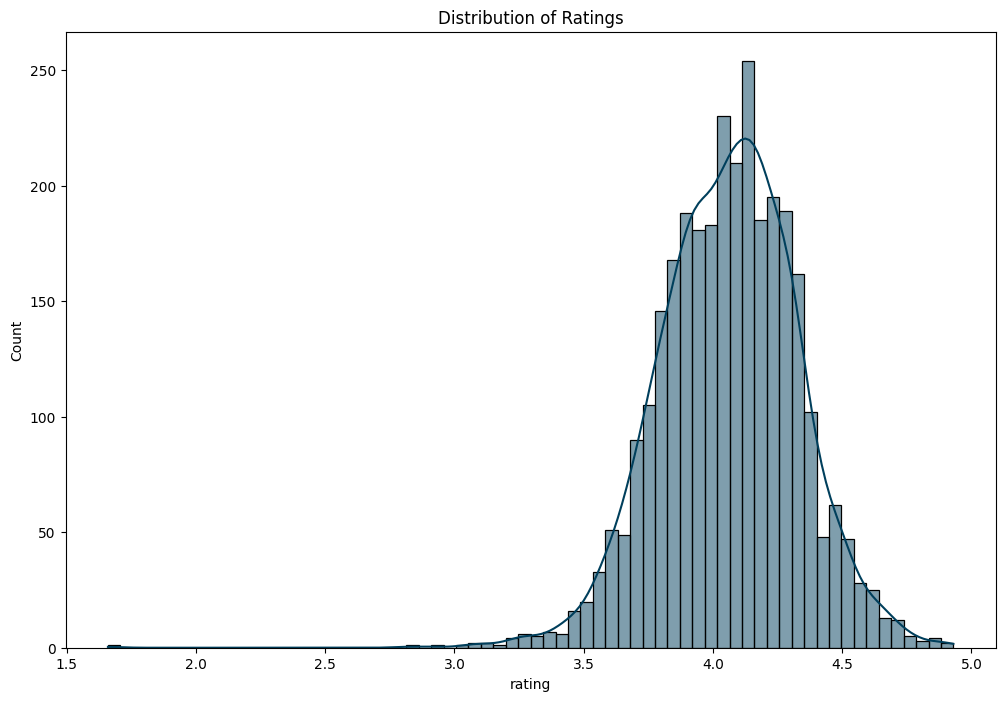

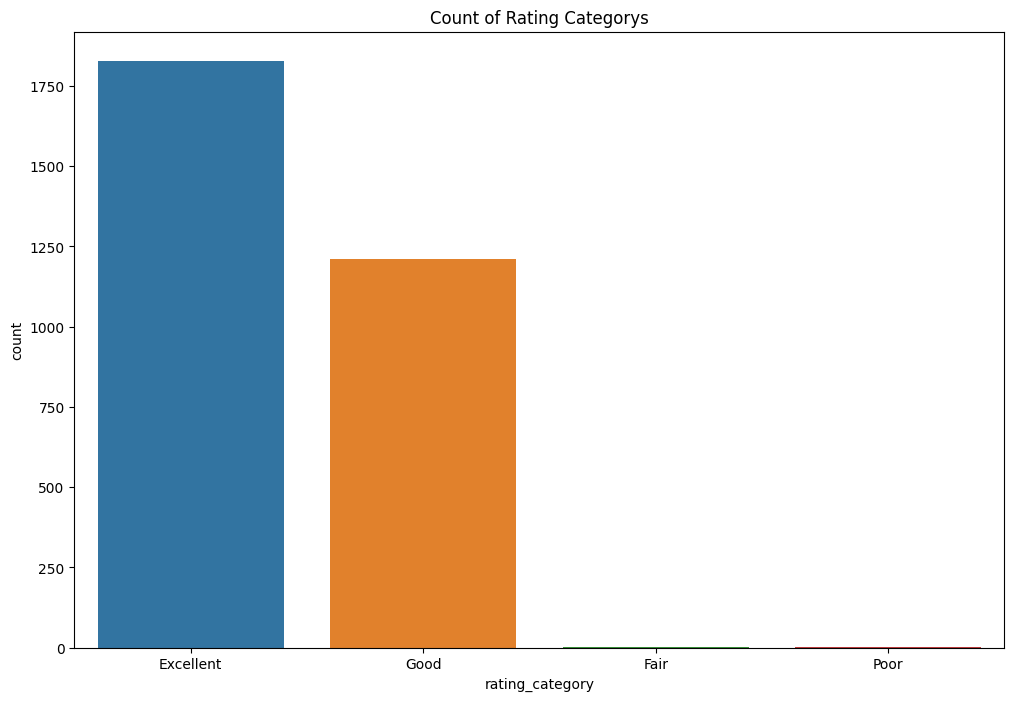

In [12]:
#Visualize Numeric Values as well as Distribution of Rating and word count# 
numeric_df = df.select_dtypes(include=np.number)
#numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,fmt=".2")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
sns.histplot(numeric_df.dropna(),x="rating",kde=True,color="#003f5c")
plt.title("Distribution of Ratings")
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(df.dropna(),x="rating_category",hue="rating_category")
plt.title("Count of Rating Categorys")
plt.show()


## Processing of Textdata

Since we have a mixture of text and numeric values i clean up the text data and analyse it.

In [13]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

nltk.download('stopwords')
text = "Hellllllooooo"
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    #text = re.sub(r'(.)\1{1,}', r'\1', text)
    text = text.split(" ")
    text = [stemmer.stem(word) for word in text if word not in  stop_words]
    text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kyild\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df["title_cleaned"] = df["title"].apply(preprocessing)
df.head()

,rank,percentile_rank,book_id,title,author,rating,rating_category,rating_tier,is_high_rated,title_length,...,word_count,author_count,author_name_length,has_series_info,series_number,title_type,has_subtitle,has_middle_name,estimated_popularity,title_cleaned
0,1,0.0,56859736,Metaphysics of Sound,Nataša Pantović,4.93,Excellent,Tier_10,True,20,...,3,1,15,False,0.0,Standard,False,False,High,metaphys sound
1,2,0.1,41212190,Learn Spanish with stories and audios as workb...,Anton Hager,4.92,Excellent,Tier_10,True,166,...,24,1,11,False,0.0,Subtitle,True,False,High,learn spanish stori audio workbook spanish lan...
2,3,0.1,38479831,Rivers Never Fill The Sea,Giselle V. Steele,4.88,Excellent,Tier_10,True,25,...,5,1,17,False,0.0,Standard,False,True,High,river never fill sea
3,4,0.1,29380718,Secret of the Cassin's Family Curse (Castle of...,Julie-Anne Gamble,4.88,Excellent,Tier_10,True,61,...,10,1,17,True,1.0,Series,False,False,High,secret cassin famili curs castl mysteri
4,5,0.2,35514861,What Healing Should Be: How to relieve pain an...,George Alexandru,4.88,Excellent,Tier_10,True,62,...,11,1,17,False,0.0,Subtitle,True,False,High,heal reliev pain stop suffer


In [15]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kyild\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\kyild\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\kyild\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\kyild\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\kyild\AppData\Roaming\nltk_data...
[

True

### Visualizing of word frequencies

<FreqDist with 4170 samples and 10646 outcomes>


[('stori', 75),
 ('book', 67),
 ('life', 63),
 ('chronicl', 60),
 ('hous', 52),
 ('one', 51),
 ('world', 48),
 ('man', 47),
 ('dark', 46),
 ('love', 46),
 ('war', 45),
 ('night', 42),
 ('trilog', 40),
 ('time', 40),
 ('girl', 40),
 ('death', 39),
 ('tale', 38),
 ('saga', 38),
 ('shadow', 35),
 ('last', 35)]

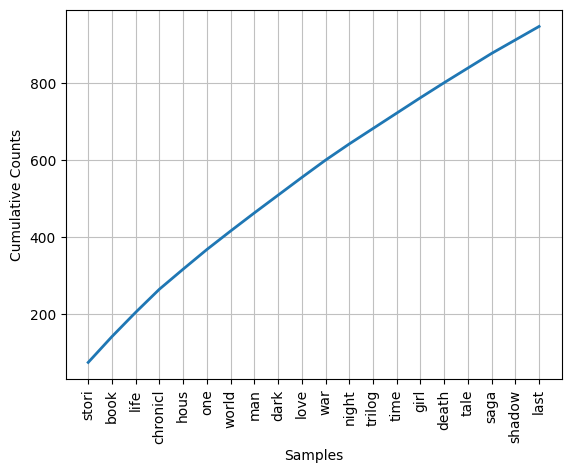

In [16]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
text = df["title_cleaned"][:]
text_tokenized = word_tokenize(str(" ".join(text)))
fre_distribution = FreqDist(text_tokenized)
print(fre_distribution )
fre_distribution.plot(20, cumulative=True)
fre_distribution.most_common(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'stori'),
  Text(1, 0, 'book'),
  Text(2, 0, 'life'),
  Text(3, 0, 'chronicl'),
  Text(4, 0, 'hous'),
  Text(5, 0, 'one'),
  Text(6, 0, 'world'),
  Text(7, 0, 'man'),
  Text(8, 0, 'dark'),
  Text(9, 0, 'love'),
  Text(10, 0, 'war'),
  Text(11, 0, 'night'),
  Text(12, 0, 'trilog'),
  Text(13, 0, 'time'),
  Text(14, 0, 'girl'),
  Text(15, 0, 'death'),
  Text(16, 0, 'tale'),
  Text(17, 0, 'saga'),
  Text(18, 0, 'shadow'),
  Text(19, 0, 'last')])

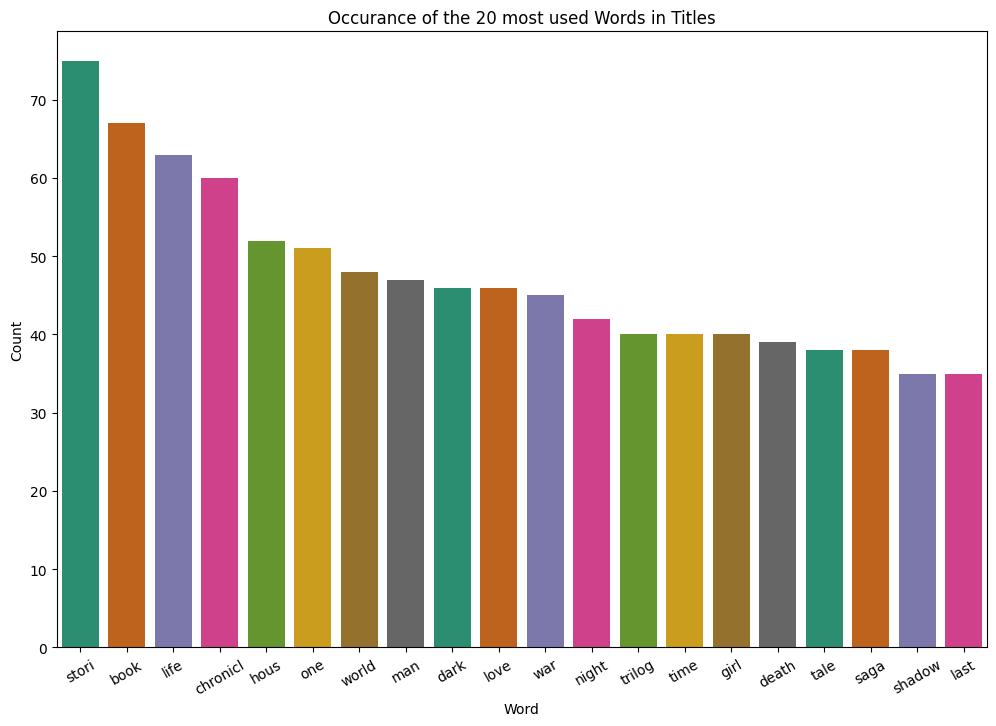

In [22]:
distribution=pd.DataFrame(fre_distribution.most_common(20),columns=["Word","Count"])
plt.figure(figsize=(12,8))
sns.barplot(distribution,x="Word",y="Count",hue="Word",palette="Dark2")
plt.title("Occurance of the 20 most used Words in Titles")
plt.xticks(rotation=30)

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Preparing the Data for Machine Learning

In [224]:

y=df["is_high_rated"].astype(int)
X=df[['title_length','word_count','author_count', 'author_name_length', 'series_number','title_cleaned']]
#X=df["title_cleaned"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

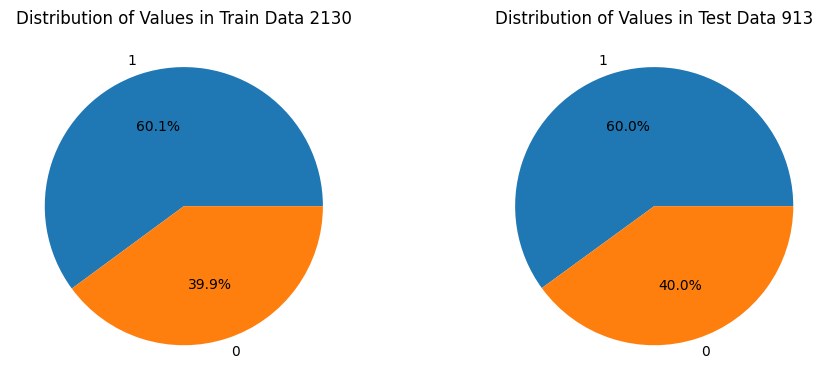

In [228]:
# Checking the Distribution of values to see if stratify worked
# Create figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart for train data
axes[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
axes[0].set_title("Distribution of Values in Train Data " + str(len(y_train)))

# Pie chart for test data
axes[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
axes[1].set_title("Distribution of Values in Test Data " + str(len(y_test)))


# Adjust layout
plt.tight_layout()
plt.show()

In [229]:
lr = LogisticRegression(max_iter=1000)
tfid = TfidfVectorizer()
scaler = StandardScaler()
X_vectorized_train = tfid.fit_transform(X_train["title_cleaned"])
X_vectorized_test = tfid.transform(X_test["title_cleaned"])
X_train_num = scaler.fit_transform(X_train[['title_length', 'author_count', 'author_name_length', 'series_number']])
X_test_num = scaler.transform(X_test[['title_length', 'author_count', 'author_name_length', 'series_number']])

In [230]:
from scipy.sparse import hstack

X_train_comb = hstack([X_vectorized_train,X_train_num])
X_test_comb = hstack([X_vectorized_test,X_test_num])

In [231]:
lr.fit(X_train_comb,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [232]:
y_pred = lr.predict(X_test_comb)

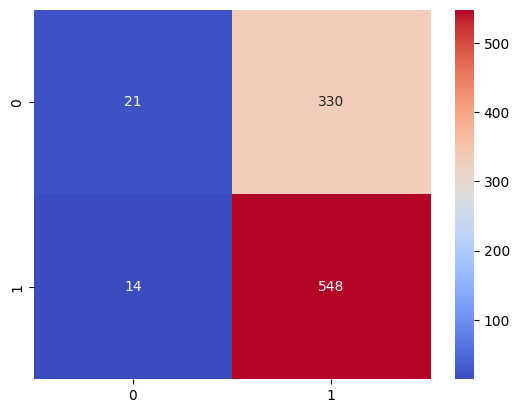

Accuracy: 0.62


In [242]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='coolwarm')
plt.show()
print(f'Accuracy: {accuracy:.2f}')